## IMPORTING LIBARIRES;

In [1]:
import pandas as pd
import numpy as np
import os
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from keras.models import Model, Sequential, load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, GlobalAveragePooling2D,Activation,Input
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
! pip install seaborn
import seaborn as sns
import cv2


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


## DATA LOADING:

In [2]:
data_dir=r"C:\Users\0618\Documents\projects\FEB\TK100323\Backend\Data\train"
yamm=[]
for file in os.listdir(data_dir):
    yamm+=[file]
print(yamm)
print(len(yamm))

['CloseEye', 'OpenEye']
2


## DATA PRE-PROCESSING:

In [3]:
img_height,img_width=224,224
batch_size=20

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.3)
train_generator = train_datagen.flow_from_directory(data_dir,
                                                target_size=(img_height,img_width),
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                subset='training')
test_generator = train_datagen.flow_from_directory(data_dir,
                                                target_size=(img_height,img_width),
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                subset='validation')

Found 43670 images belonging to 2 classes.
Found 18714 images belonging to 2 classes.


## APPLYING CNN ALGORITHM:

In [5]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='Same', activation='relu', input_shape=(img_height,img_width, 3)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters=96, kernel_size=(3,3), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters=96, kernel_size=(3,3), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(2, activation="softmax"))

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 96)        55392     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 28, 28, 96)       

In [6]:
model.compile(optimizer='Adam',loss="categorical_crossentropy",metrics=["accuracy"])
hist=model.fit(train_generator,epochs=20,validation_data=test_generator,verbose=1)


Epoch 1/20


2184/2184 [==============================] - 1625s 743ms/step - loss: 0.1637 - accuracy: 0.9356 - val_loss: 1.8579 - val_accuracy: 0.8056
Epoch 2/20
2184/2184 [==============================] - 1480s 678ms/step - loss: 0.0672 - accuracy: 0.9777 - val_loss: 1.2247 - val_accuracy: 0.7978
Epoch 3/20
2184/2184 [==============================] - 1492s 683ms/step - loss: 0.0453 - accuracy: 0.9844 - val_loss: 0.8988 - val_accuracy: 0.8123
Epoch 4/20
2184/2184 [==============================] - 1449s 663ms/step - loss: 0.0407 - accuracy: 0.9858 - val_loss: 0.8368 - val_accuracy: 0.8251
Epoch 5/20
2184/2184 [==============================] - 1429s 655ms/step - loss: 0.0338 - accuracy: 0.9874 - val_loss: 6.4561 - val_accuracy: 0.7592
Epoch 6/20
2184/2184 [==============================] - 1424s 652ms/step - loss: 0.0294 - accuracy: 0.9899 - val_loss: 3.4215 - val_accuracy: 0.8054
Epoch 7/20
2184/2184 [==============================] - 1359s 622ms/step - loss: 0.0268 - accuracy: 0.9

TypeError: _process_plot_var_args.__call__() got multiple values for argument 'axes'

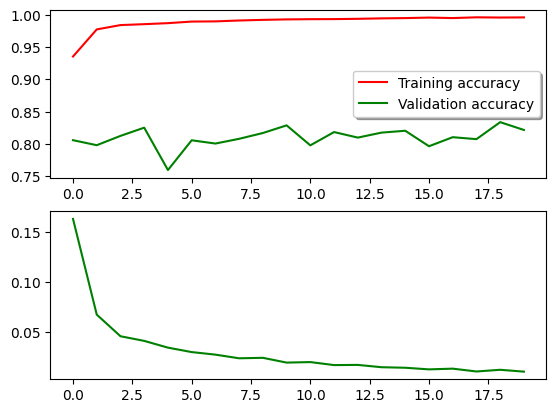

In [7]:
fig, ax = plt.subplots(2,1)
ax[0].plot(hist.history['accuracy'], color='r', label="Training accuracy")
ax[0].plot(hist.history['val_accuracy'], color='g',label="Validation accuracy")
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(hist.history['loss'], color='g', label="Training loss")
ax[1].plot(hist.history['val_loss'], color='r', label="validation loss",axes =ax[1])
legend = ax[1].legend(loc='best', shadow=True)

In [8]:
model.evaluate(test_generator)
model.save("CNN.h5")

936/936 [==============================] - 128s 136ms/step - loss: 5.0163 - accuracy: 0.8215


C:\Users\0618\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
